# Data 201

Data Wrangling, S2 2022

## Assignement 2

### 20% of final grade

## Due date: 11:59pm Friday 29th September 2023

The assignment must be submitted on the DATA 201 and 422 Learn page and should be **your own pair** (or group of three if we are odd) **work**. Avoid plagiarism: if you are not sure what may constitute code plagiarism, read this http://web.science.mq.edu.au/~mtaylor/ponline/index.php?id=source-code-plagiarism. Remember, when in doubt **declare your sources**.  
As a general rule, late submission are **highly** unsuggested. The pace of the course is very quick, and you don't want to be working on this too long, as you would have less time for other assignments. I suggest you to submit what you have ready by the time the assignment is due, even if it is not everything we required. For any particular problem, please contact [Thomas Li](thomas.li@canterbury.ac.nz) or [Giulio Dalla Riva](giulio.dallariva@canterbury.ac.nz) or TAs.


## Instruction

### Total: 20 marks.

For this assignment you will work with data from the web. Your goal is to scrape it or request it, wrangle it, produce some plotting, in order to demonstrate that you are able to use the functions, plotting, and markdown format we have been learning.  
You shall hand in your work as a jupyter R notebook comprehending the code, the plots and, **very important**, enough comments and explanations for us to understand what you did, how you did it, and why you did it. Remember: better comments, means better marks.  
You can either modify this notebook or write a new one from scratch.

Do use the tidyverse syntax that's introduced in class and labs. If in doubt, refresh the lab material 1 to 7.

In [1]:
# Loading all necessary libraries

library(tidyverse) # loading this library so it allows us to tidy up and graph our data findings
library(magrittr) # loading this library so it allows us to use the pipe operator.
library(purrr) # loading this library so it allows us to create and work with functions
library(glue) # loading this library so it allows us to concatenate variable when it is specified.
library(stringr) # loading this library so it allows us to utilise string manipulations.
library(rvest) # loading this library so it allows us to use functions for web scraping.
library(polite) # loading this library so it allows us to use various functions responsible web scraping.
library(jsonlite) # loading this library so it allows us to use functions when dealing with files in a JSON format.

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract



Attaching package: ‘rvest’


The following object is masked from ‘package:readr’:

    guess_encoding



Attaching package: ‘jsonlite’


The following object is masked from ‘package:purrr’:

    flatten




### Task (a): scrape it (5 marks)

Identify a website page showing information you find interesting. The information should be presented across more than one page. Select one of this pages (the rest is for later) and using `rvest` (and the suit of `tidyverse` libraries we used so far, plus any other one you may need) get the html into R.

In [2]:
# URL of the top 25 most valuable clubs in the world
url <- "https://www.transfermarkt.com/spieler-statistik/wertvollstemannschaften/marktwertetop"

In [3]:
# checking if we are allowed to scrape the site
session <- url %>% 
    bow()
session

<polite session> https://www.transfermarkt.com/spieler-statistik/wertvollstemannschaften/marktwertetop
    User-agent: polite R package
    robots.txt: 3 rules are defined for 4 bots
   Crawl delay: 5 sec
  The path is scrapable for this user-agent

In [4]:
# reading out then printing out the content of the page that has the top 25 most valuable clubs
stats <- url %>% 
  read_html()
stats

{html_document}
<html lang="en">
[1] <head>\n<meta http-equiv="Content-Type" content="text/html; charset=UTF-8 ...
[2] <body>\n<div class="werbung werbung-header">\n\n<script type="text/javasc ...

In [5]:
# scraping the club names of top 25 clubs in the world
club_names <- stats %>%
     html_nodes("#yw1 .hauptlink") %>% # selecting parts of the page 
     html_text() # this was used to parse the text from the links so only the title is shown
club_names

[1] "Manchester City"        "Arsenal FC"             "Paris Saint-Germain"   
 [4] "Real Madrid"            "Chelsea FC"             "Bayern Munich"         
 [7] "Manchester United"      "Liverpool FC"           "FC Barcelona"          
[10] "Tottenham Hotspur"      "Newcastle United"       "Aston Villa"           
[13] "SSC Napoli"             "AC Milan"               "Inter Milan"           
[16] "Borussia Dortmund"      "Bayer 04 Leverkusen"    "West Ham United"       
[19] "Atlético de Madrid"     "Juventus FC"            "RB Leipzig"            
[22] "Real Sociedad"          "Nottingham Forest"      "AS Roma"               
[25] "Brighton & Hove Albion"

In [6]:
# scraping what leagues the top 25 most valuable clubs play in
league <- stats %>%
     html_nodes("td.links") %>% # selecting parts of the page 
     html_text() # this was used to parse the text from the links so only the title is shown
league

[1] "Premier League" "Premier League" "Ligue 1"        "LaLiga"        
 [5] "Premier League" "Bundesliga"     "Premier League" "Premier League"
 [9] "LaLiga"         "Premier League" "Premier League" "Premier League"
[13] "Serie A"        "Serie A"        "Serie A"        "Bundesliga"    
[17] "Bundesliga"     "Premier League" "LaLiga"         "Serie A"       
[21] "Bundesliga"     "LaLiga"         "Premier League" "Serie A"       
[25] "Premier League"

In [7]:
# scraping the market value of the top 25 clubs in the world
market_value <- stats %>%
     html_nodes("#yw1 td.rechts") %>% # selecting parts of the page 
     html_text() # this was used to parse the text from the links so only the title is shown
market_value

[1] "€1.18bn "  "€1.09bn "  "€1.03bn "  "€991.00m " "€925.75m " "€897.53m "
 [7] "€882.30m " "€830.70m " "€814.30m " "€689.30m " "€598.00m " "€597.70m "
[13] "€577.75m " "€529.15m " "€523.35m " "€467.00m " "€446.05m " "€443.15m "
[19] "€442.00m " "€433.20m " "€403.10m " "€397.75m " "€381.58m " "€381.55m "
[25] "€376.30m "

In [8]:
# URL of the top 25 most valubale clubs in Saudi Arabia

url2 <- "https://www.transfermarkt.com/vereins-statistik/wertvollstemannschaften/marktwertetop/plus/0/galerie/0?land_id=146&kontinent_id=1&yt0=Show"

In [9]:
# checking if we are allowed to scrape the site
session <- url2 %>% 
    bow()
session

<polite session> https://www.transfermarkt.com/vereins-statistik/wertvollstemannschaften/marktwertetop/plus/0/galerie/0?land_id=146&kontinent_id=1&yt0=Show
    User-agent: polite R package
    robots.txt: 3 rules are defined for 4 bots
   Crawl delay: 5 sec
  The path is scrapable for this user-agent

In [10]:
# reading out then printing out the content of the page that has the top 25 most valuable clubs in Saudi Arabia

stats2 <- url2 %>% 
  read_html()
stats2

{html_document}
<html lang="en">
[1] <head>\n<meta http-equiv="Content-Type" content="text/html; charset=UTF-8 ...
[2] <body>\n<div class="werbung werbung-header">\n\n<script type="text/javasc ...

In [11]:
# scraping the names of each club that are in top 25 most valuable clubs in Saudi Arabia
saudi_clubs <- stats2 %>%
     html_nodes("#yw1 .hauptlink") %>% # selecting parts of the page 
     html_text() # this was used to parse the text from the links so only the title is shown
saudi_clubs

[1] "Al-Hilal SFC"    "Al-Ahli SFC"     "Al-Nassr FC"     "Al-Ittihad Club"
 [5] "Al-Shabab FC"    "Al-Ettifaq FC"   "Al-Taawoun FC"   "Al-Fayha FC"    
 [9] "Abha Club"       "Al-Fateh SC"     "Al-Riyadh SC"    "Damac FC"       
[13] "Al-Raed SFC"     "Al-Tai FC"       "Al-Hazem SC"     "Al-Okhdood Club"
[17] "Al-Wehda FC"     "Al-Qadsiah FC"   "Al-Khaleej FC"   "Ohod Club"      
[21] "Al-Adalah FC"    "Al-Batin FC"     "Al-Faisaly FC"   "Al-Bukiryah FC" 
[25] "Al-Jabalain FC"

In [12]:
# scraping the league each club plays in. For clarification Saudi Pro League is the top division in Saudi Arabia and Yelo League
# is the second division in Saudi Arabia
saudi_league <- stats2 %>%
     html_nodes("td.links") %>% # selecting parts of the page 
     html_text() # this was used to parse the text from the links so only the title is shown
saudi_league

[1] "Saudi Pro League" "Saudi Pro League" "Saudi Pro League" "Saudi Pro League"
 [5] "Saudi Pro League" "Saudi Pro League" "Saudi Pro League" "Saudi Pro League"
 [9] "Saudi Pro League" "Saudi Pro League" "Saudi Pro League" "Saudi Pro League"
[13] "Saudi Pro League" "Saudi Pro League" "Saudi Pro League" "Saudi Pro League"
[17] "Saudi Pro League" "Yelo League"      "Saudi Pro League" "Yelo League"     
[21] "Yelo League"      "Yelo League"      "Yelo League"      "Yelo League"     
[25] "Yelo League"

In [13]:
# scraping the market value of the top 25 most valuable clubs in Saudi Arabia
saudi_market_value <- stats2 %>%
     html_nodes("#yw1 td.rechts") %>% # selecting parts of the page 
     html_text() # this was used to parse the text from the links so only the title is shown
saudi_market_value

[1] "€257.40m " "€200.98m " "€195.56m " "€133.20m " "€69.45m "  "€66.83m " 
 [7] "€34.76m "  "€30.30m "  "€27.13m "  "€24.78m "  "€21.23m "  "€20.34m " 
[13] "€17.80m "  "€17.30m "  "€16.98m "  "€16.28m "  "€16.05m "  "€15.88m " 
[19] "€15.06m "  "€9.58m "   "€5.25m "   "€5.03m "   "€4.60m "   "€3.83m "  
[25] "€3.70m "

### Task (b): wrangle it (5 marks)


Working on the page from task (a), transform the data you collected into relational data model (that is, one or more data frames). WARNING: you will need to think and motivate how you are doing this in terms of the **data model** you are trying to build; just throwing everything in a table is not enough.

In [14]:
# Creating a data frame that displays the top 25 most valuable clubs in the world, the league they play and the clubs market value
most_valuable_clubs <- tibble(
  Club_Names = club_names,
  League = league,
  Market_Value = market_value
)
most_valuable_clubs

Club_Names,League,Market_Value
<chr>,<chr>,<chr>
Manchester City,Premier League,€1.18bn
Arsenal FC,Premier League,€1.09bn
Paris Saint-Germain,Ligue 1,€1.03bn
Real Madrid,LaLiga,€991.00m
Chelsea FC,Premier League,€925.75m
Bayern Munich,Bundesliga,€897.53m
Manchester United,Premier League,€882.30m
Liverpool FC,Premier League,€830.70m
FC Barcelona,LaLiga,€814.30m


In [15]:
# Creating a data frame that displays the top 25 most valuable clubs in Saudi Arabia, the league they play and the clubs market value

most_valuable_saudi_clubs <- tibble(
  Club_Names = saudi_clubs,
  Saudi_League = saudi_league,
  Saudi_Market_Value = saudi_market_value
)
most_valuable_saudi_clubs

Club_Names,Saudi_League,Saudi_Market_Value
<chr>,<chr>,<chr>
Al-Hilal SFC,Saudi Pro League,€257.40m
Al-Ahli SFC,Saudi Pro League,€200.98m
Al-Nassr FC,Saudi Pro League,€195.56m
Al-Ittihad Club,Saudi Pro League,€133.20m
Al-Shabab FC,Saudi Pro League,€69.45m
Al-Ettifaq FC,Saudi Pro League,€66.83m
Al-Taawoun FC,Saudi Pro League,€34.76m
Al-Fayha FC,Saudi Pro League,€30.30m
Abha Club,Saudi Pro League,€27.13m


In [ ]:
# In Task B i created a 2 Dataframes. The first dataframe contains the club names, league and market values of the top 25 
# in the world, the second dataframe contains the club names, leage and market values of the top 25 most valuable clubs in Saudi Arabia

### Task (c): automate it (5 marks)

Now it's the time to scrape everything else in the website. Turn your code for tasks (a) and (b) into a function and using `purrr` (and its `map_` functions, possibly in combination with `possibly`) apply that function to all the pages you are interested in (as we have done in lab 6); the output of the task should be a relation dataset (i.e., one or more dataframes, and if more than one, explicit their relationships).

In [16]:
# Created a helper function to help read all the content of the page
scrape_page <- function(url){
  
  # Reading out the content of the page
  stats <- read_html(url)

  # Scraping the club names, leagues, and market values
  club_names <- stats %>%
    html_nodes("#yw1 .hauptlink") %>%
    html_text()

  league <- stats %>%
    html_nodes("td.links") %>%
    html_text()

  market_value <- stats %>%
    html_nodes("#yw1 td.rechts") %>%
    html_text()

  # Returning the data that was scraped a a table 
  return(tibble(Club_Names = club_names, League = league, Market_Value = market_value))
}


In [17]:
# Setting the base URL then creating a vector for the amount of pages then adjusting the URLS for each of the pages

base_url <- "https://www.transfermarkt.com/spieler-statistik/wertvollstemannschaften/marktwertetop"
pages <- 1:4 
urls <- paste0(base_url, "?page=", pages)


In [18]:
# Using purrr to scrape all pages and bind them together then creating a table of all the pages combined
all_clubs <- urls %>% 
  map_df(~ possibly(scrape_page, otherwise = tibble(Club_Names = character(0), League = character(0), Market_Value = character(0)))(.))
all_clubs

Club_Names,League,Market_Value
<chr>,<chr>,<chr>
Manchester City,Premier League,€1.18bn
Arsenal FC,Premier League,€1.09bn
Paris Saint-Germain,Ligue 1,€1.03bn
Real Madrid,LaLiga,€991.00m
Chelsea FC,Premier League,€925.75m
Bayern Munich,Bundesliga,€897.53m
Manchester United,Premier League,€882.30m
Liverpool FC,Premier League,€830.70m
FC Barcelona,LaLiga,€814.30m


In [19]:
# Define a function to scrape club information from Saudi Arabia
scrape_saudi_page <- function(url){
  
  # Reading out the content of the page
  stats <- read_html(url2)

  # Scrape club names, leagues, and market values for Saudi Arabia
  saudi_clubs <- stats %>%
    html_nodes("#yw1 .hauptlink") %>%
    html_text()

  saudi_league <- stats %>%
    html_nodes("td.links") %>%
    html_text()

  saudi_market_value <- stats %>%
    html_nodes("#yw1 td.rechts") %>%
    html_text()

  # Return as a tibble
  return(tibble(Club_Names = saudi_clubs, Saudi_League = saudi_league, Saudi_Market_Value = saudi_market_value))
}

In [20]:
# Setting the base URL then creating a vector for the amount of pages then adjusting the URLS for each of the pages
base_url_saudi <- "https://www.transfermarkt.com/vereins-statistik/wertvollstemannschaften/marktwertetop/plus/0/galerie/0?land_id=146&kontinent_id=1&yt0=Show"
pages_saudi <- 1:4
urls_saudi <- paste0(base_url_saudi, "&page=", pages_saudi)

In [21]:
# Using purrr to scrape all pages and bind them together then creating a table of all the pages combined

all_saudi_clubs <- urls_saudi %>% 
  map_df(~ possibly(scrape_saudi_page, otherwise = tibble(Club_Names = character(0), Saudi_League = character(0), Saudi_Market_Value = character(0)))(.))

# Using the distinct function because there would be duplicated clubs if i didnt as there was a problem with the site URL 
# when updating the new pages
all_saudi_clubs <- all_saudi_clubs %>% 
    distinct(Club_Names, .keep_all = TRUE) 
# found how to use the distinct function which was used to stop duplicated entries into the table from https://www.datanovia.com/

all_saudi_clubs

Club_Names,Saudi_League,Saudi_Market_Value
<chr>,<chr>,<chr>
Al-Hilal SFC,Saudi Pro League,€257.40m
Al-Ahli SFC,Saudi Pro League,€200.98m
Al-Nassr FC,Saudi Pro League,€195.56m
Al-Ittihad Club,Saudi Pro League,€133.20m
Al-Shabab FC,Saudi Pro League,€69.45m
Al-Ettifaq FC,Saudi Pro League,€66.83m
Al-Taawoun FC,Saudi Pro League,€34.76m
Al-Fayha FC,Saudi Pro League,€30.30m
Abha Club,Saudi Pro League,€27.13m


In [ ]:
# In this task i automated and scraped all the pages under both URLS that had the 25 most valuable clubs in the world and the 
# 25 most clubs in Saudi Arabia, however when doing this task for the Saudi Teams i encountered a problem as it the pages would
# not be updating correctly, so i could only plot the top 25 clubs and not the other 75 saudi clubs. So i used the distinct 
# function to stop the clubs duplicating

### Task (d): plot it (2 marks)

Use graphics (via `ggplot`) to represent the data you collected in a meaningful way.

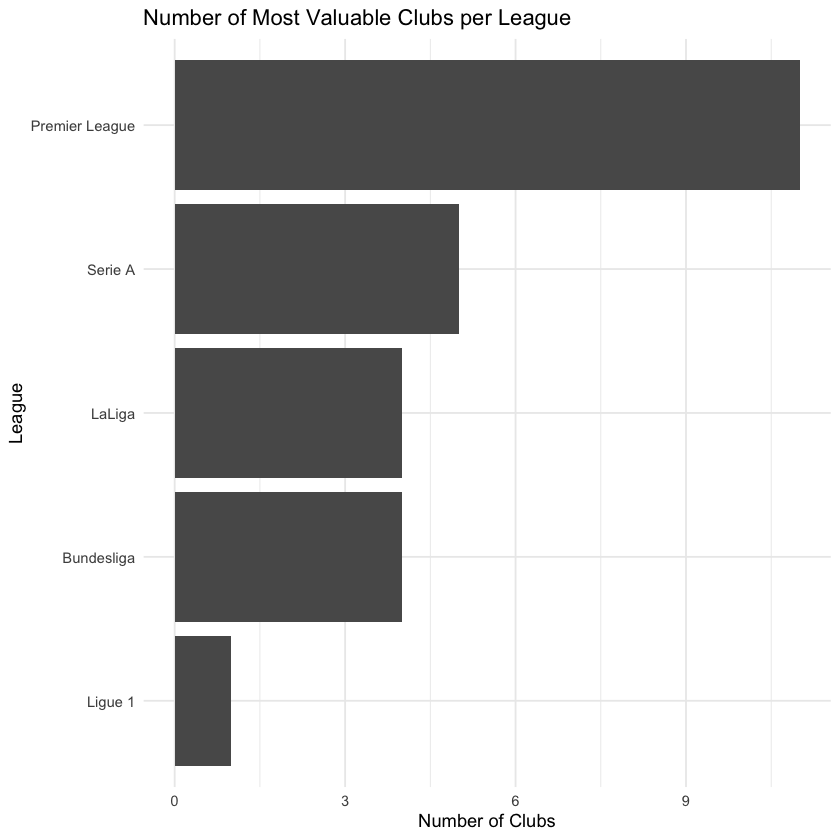

In [22]:
#Plotting the number of each of the most valuable clubs in the world and what league they play in

league_counts <- most_valuable_clubs %>% count(League)

ggplot(league_counts, aes(x=reorder(League, n), y=n)) +
  geom_bar(stat="identity") +
  coord_flip() +
  labs(title="Number of Most Valuable Clubs per League",
       x="League",
       y="Number of Clubs") +
  theme_minimal()

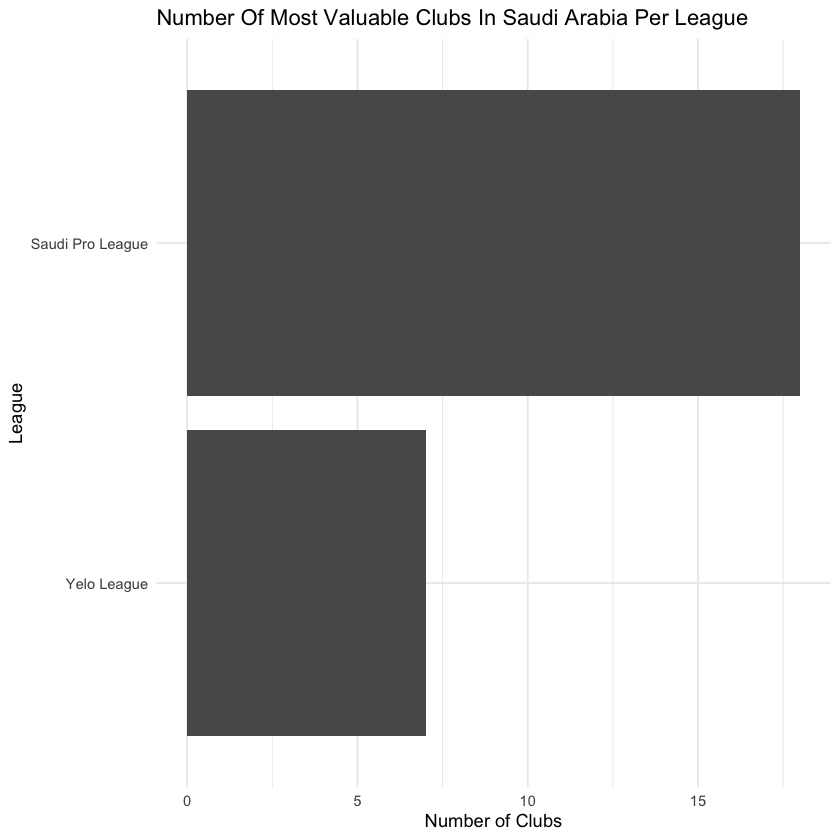

In [23]:
#Plotting the number of each of the most valuable clubs in Saudi Arabia and what league they play in

saudi_league_counts <- most_valuable_saudi_clubs %>% count(Saudi_League)

ggplot(saudi_league_counts, aes(x=reorder(Saudi_League, n), y=n)) +
  geom_bar(stat="identity") +
  coord_flip() +
  labs(title="Number Of Most Valuable Clubs In Saudi Arabia Per League",
       x="League",
       y="Number of Clubs") +
  theme_minimal()

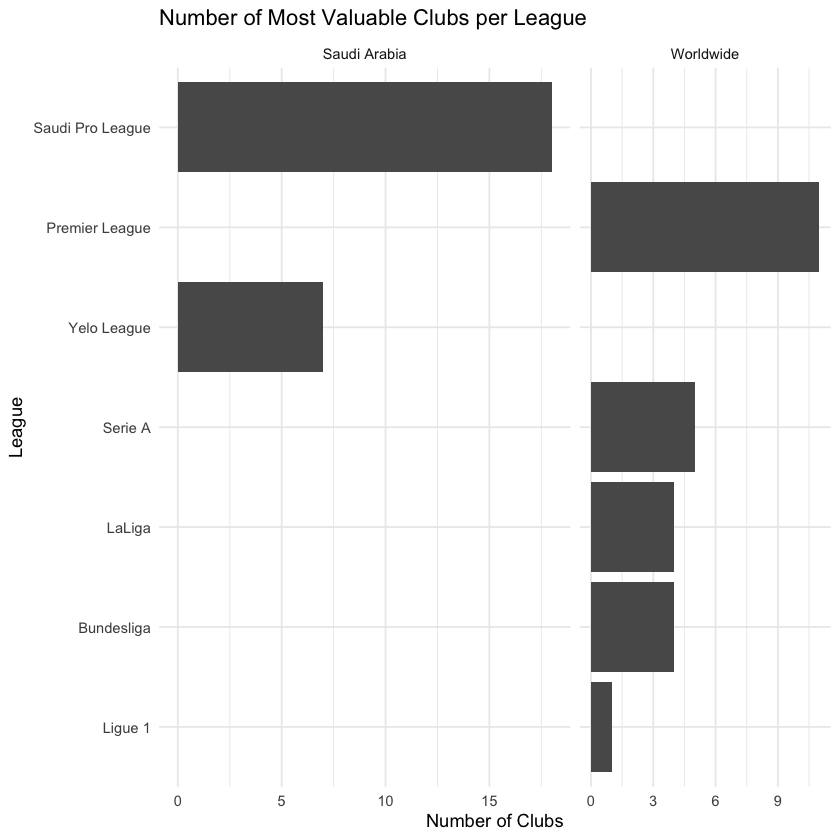

In [24]:
# Combining the data frames to create a combined plot of the previous 2 plots
saudi_league_counts <- saudi_league_counts %>% mutate(Source = "Saudi Arabia")
league_counts <- league_counts %>% rename(Saudi_League = League) %>% mutate(Source = "Worldwide")

combined_counts <- bind_rows(saudi_league_counts, league_counts)

# Plotting the combined data
ggplot(combined_counts, aes(x=reorder(Saudi_League, n), y=n)) +
  geom_bar(stat="identity") +
  coord_flip() +
  labs(title="Number of Most Valuable Clubs per League",
       x="League",
       y="Number of Clubs") +
  theme_minimal() +
  facet_grid(~ Source, scales = "free", space = "free")

In [25]:
# In this task i plotted the data of top 25 most valuable clubs in the world and what league they play in, the plot shows us that
# majority of the most valuable clubs play in the Premier League, with Serie A behind and the Bundelsiga and La Liga closely follow
# with Ligue 1 having the least, the second plot i did was plotting the most valuable clubs in Saudi Arabia and what league they play
# and the plot shows that most clubs Saudi Pro League which is the first division in Saudi Arabia. Yelo League has some in the top 25 
# nothing compared the Saudi Pro League. The third graphs tells what we previously knew but is just combining the graphs.
# Finally, i tried plotting the market values of the top 25 clubs in the world and the top 25 in Saudi Arabia which was the main 
# idea of the project but struggled as all values were different wiht millions and billions and i just couldnt get the
# correct formatting unfortunately :(.

### Task (e): APIs (2 marks)

Identify a web service offering data through an API. Access the API using `httr` and collect the information you care about. Convert the data into a dataframe (or more than one). Represent it graphically in a meaningful way.

In [37]:
# Grabbing the endpoint to access the list of all the public APIs.
# Placeholder url that has the entries
ap_endpoint <- "/random"
api_url_placeholder <- "https://api.publicapis.org{ap_endpoint}"

In [38]:
# Creating all the URLS that allows us to access all the public APIs.
api_url <- glue(api_url_placeholder)
api_url

https://api.publicapis.org/random

In [39]:
library(httr) # loading this library so i can access and print information about the APIS

In [40]:
# Printing out some information about all the APIS
api <- GET(api_url)
api

Response [https://api.publicapis.org/random]
  Date: 2023-09-28 02:09
  Status: 200
  Content-Type: application/json
  Size: 212 B
{"count":1,"entries":[{"API":"apilayer userstack","Description":"Secure User-...

In [41]:
# Accessing the content of the previous request and displaing all the raw data inside .
api_content <- api %>% 
    content("text", encoding = "UTF-8")
api_content

[1] "{\"count\":1,\"entries\":[{\"API\":\"apilayer userstack\",\"Description\":\"Secure User-Agent String Lookup JSON API\",\"Auth\":\"OAuth\",\"HTTPS\":true,\"Cors\":\"unknown\",\"Link\":\"https://userstack.com/\",\"Category\":\"Development\"}]}\n"

In [42]:
# Converting the api_content from JSON to an object in R.
# Displaying a data frame that contains all the information about all the public APIs in the list
api_data <- api_content %>% 
    fromJSON()
api_data %>% 
    head()

,API,Description,Auth,HTTPS,Cors,Link,Category
,<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>,<chr>
1,apilayer userstack,Secure User-Agent String Lookup JSON API,OAuth,TRUE,unknown,https://userstack.com/,Development


### Comment, explain and present the work in a clear way (1 marks)